# Анализ данных и визуализация

Этот ноутбук демонстрирует генерацию данных из косинусного распределения, построение гистограмм, расчет статистик выборки и доверительных интервалов. Также выполняется загрузка данных, их группировка и расчет статистик по группам.

Часть 1: Центральная предельная теорема для различных распределений

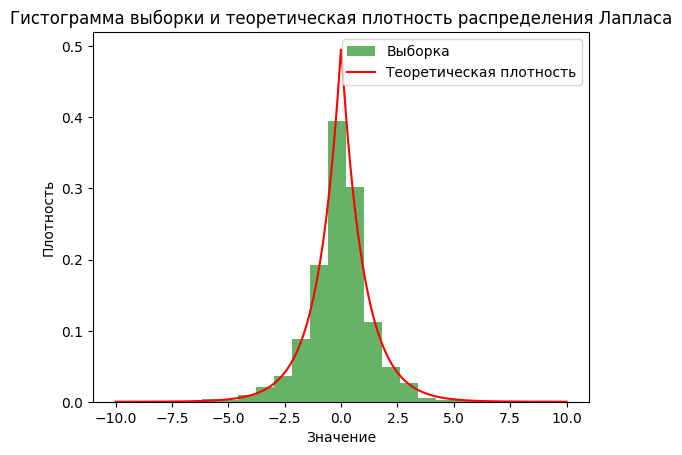

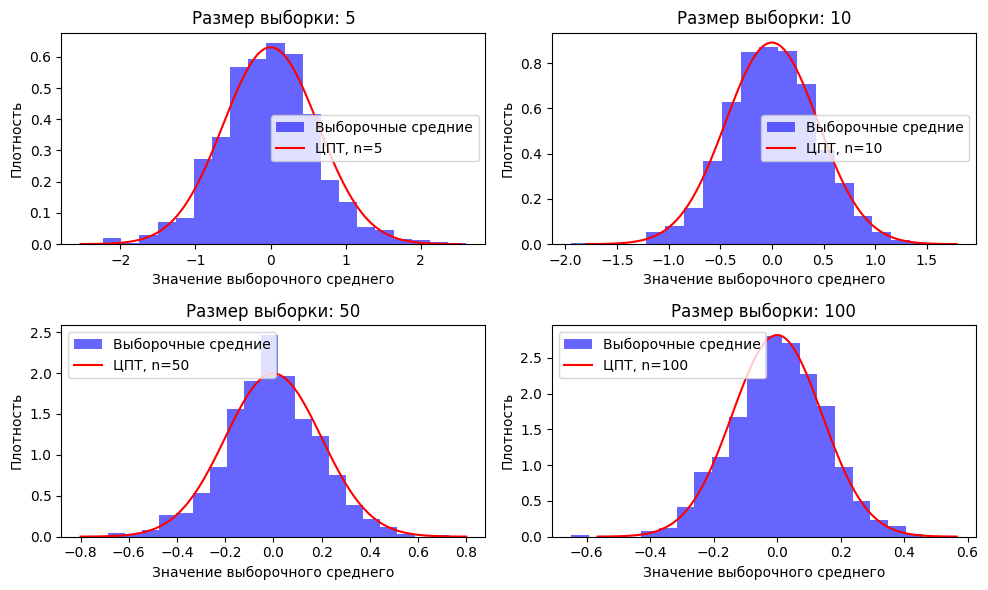

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

# Создаем распределение Лапласа
laplace_rv = sts.laplace()

# Генерируем выборку
sample = laplace_rv.rvs(1000)

# Реальные значения среднего и дисперсии
real_mean = laplace_rv.mean()
real_var = laplace_rv.var()

# Построение гистограммы и теоретической плотности
plt.hist(sample, density=True, bins=20, alpha=0.6, color='g', label='Выборка')

x = np.linspace(-10, 10, 1000)
pdf = laplace_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', color='r')

plt.legend()
plt.title("Гистограмма выборки и теоретическая плотность распределения Лапласа")
plt.xlabel("Значение")
plt.ylabel("Плотность")
plt.show()
# Размеры выборок
sample_sizes = [5, 10, 50, 100]

# Количество экспериментов
n_experiments = 1000

plt.figure(figsize=(10, 6))

for i, size in enumerate(sample_sizes):
    sample_means = [np.mean(laplace_rv.rvs(size)) for _ in range(n_experiments)]
    
    plt.subplot(2, 2, i+1)
    plt.hist(sample_means, density=True, bins=20, alpha=0.6, color='b', label='Выборочные средние')
    
    # Теоретическая плотность распределения выборочного среднего по ЦПТ
    mu = real_mean
    sigma = np.sqrt(real_var / size)
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
    plt.plot(x, sts.norm.pdf(x, loc=mu, scale=sigma), label=f'ЦПТ, n={size}', color='r')
    
    plt.title(f'Размер выборки: {size}')
    plt.xlabel("Значение выборочного среднего")
    plt.ylabel("Плотность")
    plt.legend()

plt.tight_layout()
plt.show()


Часть 2: Доверительный интервал для оттока клиентов телеком-компании

In [ ]:
import pandas as pd

# Загружаем данные
url = "https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df = pd.read_csv(url)

# Проверяем данные
df.head()
